<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/mmd_metric/MMD_Russian_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repository cloning

In [ ]:
!git clone https://github.com/Derinhelm/parser_stat.git

fatal: destination path 'parser_stat' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/parser_stat')

In [ ]:
!mkdir pics

mkdir: cannot create directory ‘pics’: File exists


# Data getting

In [ ]:
from data_classes import ConllEntry, Sentence

In [ ]:
import pickle

In [ ]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [ ]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [ ]:
treebank_names = ['taiga', 'poetry', 'gsd', 'pud', 'syntagrus']

# Parsing result getting

In [ ]:
import pandas as pd

In [ ]:
parser_names = ["natasha", "udpipe", "spacy", "deeppavlov", "stanza"]

In [ ]:
parser_res = {}
for p in parser_names:
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

In [ ]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][95].tokens]

[('1', '4', 'obl'),
 ('2', '4', 'case'),
 ('3', '4', 'amod'),
 ('4', '0', 'root'),
 ('5', '4', 'nsubj'),
 ('6', '5', 'flat:foreign'),
 ('7', '5', 'flat:foreign'),
 ('8', '5', 'flat:foreign'),
 ('9', '5', 'flat:foreign'),
 ('10', '4', 'punct'),
 ('1', '2', 'punct'),
 ('2', '4', 'parataxis'),
 ('3', '2', 'punct'),
 ('4', '0', 'root'),
 ('5', '4', 'xcomp'),
 ('6', '5', 'obj'),
 ('7', '8', 'amod'),
 ('8', '6', 'nmod'),
 ('9', '4', 'punct')]

In [ ]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [ ]:
parser_res['stanza']['syntagrus'][95].sent_id

'2003Armeniya.xml_96'

In [ ]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

taiga natasha 95
taiga udpipe 42
taiga spacy 69
taiga deeppavlov 67
taiga stanza 69
poetry natasha 148
poetry udpipe 43
poetry spacy 24
poetry deeppavlov 50
poetry stanza 65
gsd natasha 83
gsd udpipe 7
gsd spacy 14
gsd deeppavlov 18
gsd stanza 5
pud natasha 98
pud udpipe 7
pud spacy 18
pud deeppavlov 3
pud stanza 4
syntagrus natasha 1073
syntagrus udpipe 57
syntagrus spacy 220
syntagrus deeppavlov 131
syntagrus stanza 190


In [ ]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [ ]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '3', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '9', 'punct'),
 ('9', '3', 'conj'),
 ('10', '9', 'nmod'),
 ('11', '12', 'punct'),
 ('12', '10', 'parataxis'),
 ('13',

In [ ]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [ ]:
for t in treebank_names:
  for p in parser_names:
    for s in parser_res[p][t]:
      shift_token_id(s)

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Creating token start-end pairs

be_edges - set of dependency tree edges in begin-end format

In [ ]:
def create_sent_be_nodes(sent, text_transform):
    token_begin_end = []
    sent_text = text_transform(sent.text)
    original_sent_text = text_transform(sent.text)
    del_prefix_len = 0
    tokens = [t for t in sent.tokens if '.' not in t.id]
    for t_i, t in enumerate(tokens):
        token_text = text_transform(t.form)
        t_start = sent_text.find(token_text)
        if t_start == -1:
            print("Error:", sent.sent_id, f"sent_text:{sent_text}, t:{token_text}", t_i)
        else:
            b, e = (del_prefix_len + t_start,
                                  del_prefix_len + t_start + len(token_text))
            token_begin_end.append((t, (b, e)))
            del_prefix_len += t_start + len(token_text)
            sent_text = sent_text[t_start + len(token_text):]
            assert text_transform(original_sent_text[b:e]) == text_transform(tokens[t_i].form)
    sent_text = text_transform(sent.text)
    return token_begin_end

In [ ]:
def create_sent_be_edges(sent_be_tokens):
    sent_be_res = {}
    for t_id, (t, t_be) in enumerate(sent_be_tokens): # ellipsis are deleted, so index in sent_be_tokens = token_id
      parent_id = t.parent_id
      if parent_id == '0': # root
        parent_be = (-1, -1)
      else:
        _, parent_be = sent_be_tokens[int(parent_id) - 1]
      sent_be_res[t_be] = (parent_be, t.relation)
    return sent_be_res

In [ ]:
from collections import OrderedDict

In [ ]:
be_treebanks = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

{(0, 2): ((16, 20), 'nsubj'),

 (3, 15): ((16, 20), 'advmod'),

 (16, 20): ((-1, -1), 'root'),

 (21, 24): ((25, 34), 'det'),

 (25, 34): ((16, 20), 'obj'),

 (35, 43): ((16, 20), 'advmod'),

 (43, 44): ((16, 20), 'punct')}


In [ ]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_96']

{(0, 3): ((11, 15), 'obl'),
 (4, 5): ((11, 15), 'case'),
 (6, 10): ((11, 15), 'amod'),
 (11, 15): ((-1, -1), 'root'),
 (16, 24): ((11, 15), 'nsubj'),
 (25, 33): ((16, 24), 'flat:foreign'),
 (34, 42): ((16, 24), 'flat:foreign'),
 (43, 50): ((16, 24), 'flat:foreign'),
 (51, 54): ((16, 24), 'flat:foreign'),
 (54, 55): ((11, 15), 'punct'),
 (56, 57): ((57, 64), 'punct'),
 (57, 64): ((66, 72), 'parataxis'),
 (64, 65): ((57, 64), 'punct'),
 (66, 72): ((-1, -1), 'root'),
 (73, 86): ((66, 72), 'xcomp'),
 (87, 93): ((73, 86), 'obj'),
 (94, 105): ((106, 111), 'amod'),
 (106, 111): ((87, 93), 'nmod'),
 (111, 112): ((66, 72), 'punct')}

((0, 2), ((16, 20), 'nsubj')),

((3, 9), ((16, 20), 'obl')),

((9, 10), ((10, 15), 'punct')),

((10, 15), ((3, 9), 'conj')),

((16, 20), ((-1, -1), 'root')),

((21, 24), ((25, 34), 'det')),

((25, 34), ((16, 20), 'obj')),

((35, 43), ((16, 20), 'advmod')),

((43, 44), ((16, 20), 'punct'))]

# Sentence statistics

In [ ]:
import numpy as np
import networkx as nx
from collections import defaultdict

In [ ]:
def networkx_formatter(dict_Graph, nx_Graph, show=False):
    for node, value in dict_Graph.items():
        if isinstance(value, tuple) and len(value) == 2:
            head, label = value
            nx_Graph.add_node(node)
            if head != (-1, -1):
                nx_Graph.add_edge(node, head, label=label)
        else:
            print(f"Пропущено значение для узла {value} (некорректная структура)\n")

    if show:
        pos = nx.spring_layout(nx_Graph)
        nx.draw(nx_Graph, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=6, font_weight="bold")

    return nx_Graph

In [ ]:
def MMD(graphs_P, graphs_Q, kernel="wl", h=5, num_walks=10, walk_length=5, seed=None):
    # Check input data
    if not graphs_P or not graphs_Q:
        raise ValueError("Input graph lists cannot be empty")

    # Compute kernel matrices
    if kernel == "wl":
        K_P = wl_ker(graphs_P, h)
        K_Q = wl_ker(graphs_Q, h)
        K_PQ = wl_ker(graphs_P + graphs_Q, h)
    elif kernel == "rw":
        K_P = rw_ker(graphs_P, num_walks, walk_length, seed)
        K_Q = rw_ker(graphs_Q, num_walks, walk_length, seed)
        K_PQ = rw_ker(graphs_P + graphs_Q, num_walks, walk_length, seed)
    else:
        raise ValueError(f"Unknown kernel: {kernel}")

    # Number of graphs in each set
    n, m = len(graphs_P), len(graphs_Q)

    # Compute MMD
    mmd_square = (np.sum(K_P) / (n**2) +
                 np.sum(K_Q) / (m**2) -
                 2 * np.sum(K_PQ[:n, n:]) / (n * m))

    return np.sqrt(max(mmd_square, 0))  # Ensure non-negativity

In [ ]:
def wl_ker(graphs, h=3):
    """
    Weisfeiler-Lehman kernel with normalization.
    """
    feature_maps = [defaultdict(int) for _ in graphs]

    # Initialize labels with node degrees
    for i, G in enumerate(graphs):
        for node in G.nodes():
            label = str(G.degree(node))
            feature_maps[i][label] += 1

    # Multi-level label updating
    prev_labels = [defaultdict(str) for _ in graphs]
    for i, G in enumerate(graphs):
        prev_labels[i].update({node: str(G.degree(node)) for node in G.nodes()})

    for _ in range(h):
        new_labels = [defaultdict(str) for _ in graphs]

        # Update labels for each graph
        for i, G in enumerate(graphs):
            for node in G.nodes():
                # Collect neighbor labels
                neighbor_labels = sorted(prev_labels[i][neighbor] for neighbor in G.neighbors(node))
                new_label = f"{prev_labels[i][node]}_{'_'.join(neighbor_labels)}"
                new_labels[i][node] = new_label
                feature_maps[i][new_label] += 1

        prev_labels = new_labels

    # Normalize histograms
    for i in range(len(graphs)):
        total = sum(feature_maps[i].values())
        for key in feature_maps[i]:
            feature_maps[i][key] /= total

    # Compute similarity matrix
    K = np.zeros((len(graphs), len(graphs)))
    for i in range(len(graphs)):
        for j in range(len(graphs)):
            # Dot product of normalized histograms
            common_keys = set(feature_maps[i]) | set(feature_maps[j])
            K[i,j] = sum(feature_maps[i].get(k,0) * feature_maps[j].get(k,0) for k in common_keys)

    return K

### For one sentence

In [ ]:
be_treebanks['taiga']['1']

{(0, 3): ((4, 9), 'advmod'),
 (4, 9): ((12, 18), 'obl'),
 (10, 11): ((12, 18), 'case'),
 (12, 18): ((-1, -1), 'root'),
 (19, 22): ((12, 18), 'nmod'),
 (23, 24): ((25, 28), 'cc'),
 (25, 28): ((19, 22), 'conj'),
 (29, 33): ((12, 18), 'cop'),
 (34, 39): ((40, 43), 'advmod'),
 (40, 43): ((44, 50), 'nummod:gov'),
 (44, 50): ((12, 18), 'nsubj'),
 (51, 52): ((81, 86), 'cc'),
 (53, 59): ((81, 86), 'nummod:gov'),
 (60, 66): ((81, 86), 'amod'),
 (67, 80): ((81, 86), 'amod'),
 (81, 86): ((44, 50), 'conj'),
 (86, 87): ((12, 18), 'punct')}

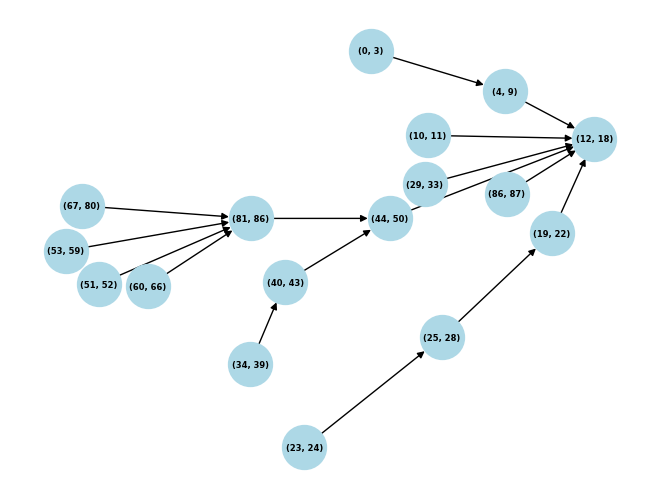

In [ ]:
P = networkx_formatter(be_treebanks['taiga']['1'], nx.DiGraph(), 1)

In [ ]:
be_parser_res['stanza']['taiga']['1']

{(0, 3): ((4, 9), 'obl'),
 (4, 9): ((12, 18), 'nmod'),
 (10, 11): ((12, 18), 'case'),
 (12, 18): ((-1, -1), 'root'),
 (19, 22): ((12, 18), 'nmod'),
 (23, 24): ((25, 28), 'cc'),
 (25, 28): ((19, 22), 'conj'),
 (29, 33): ((12, 18), 'cop'),
 (34, 39): ((12, 18), 'nsubj'),
 (40, 43): ((44, 50), 'nummod'),
 (44, 50): ((34, 39), 'obl'),
 (51, 52): ((81, 86), 'cc'),
 (53, 59): ((81, 86), 'nummod:gov'),
 (60, 66): ((81, 86), 'amod'),
 (67, 80): ((81, 86), 'amod'),
 (81, 86): ((44, 50), 'conj'),
 (86, 87): ((12, 18), 'punct')}

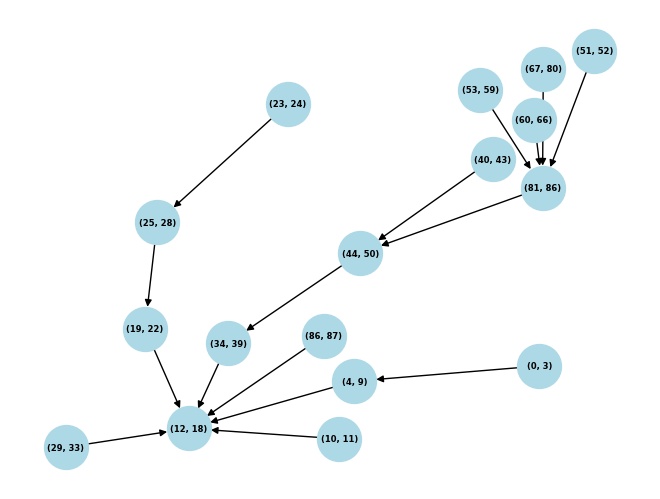

In [ ]:
Q = networkx_formatter(be_parser_res['stanza']['taiga']['1'], nx.DiGraph(), 1)

In [ ]:
Graphs_P = [P]
Graphs_Q = [Q]

In [ ]:
mmd = MMD(Graphs_P, Graphs_Q, kernel="wl", h=5)
print(f"MMD (WL): {mmd:.4f}")

MMD (WL): 0.1135


### For all dataset

In [ ]:
Graphs_P1 = []
for key, item in be_treebanks['taiga'].items():
    Graphs_P1.append(networkx_formatter(item, nx.DiGraph()))

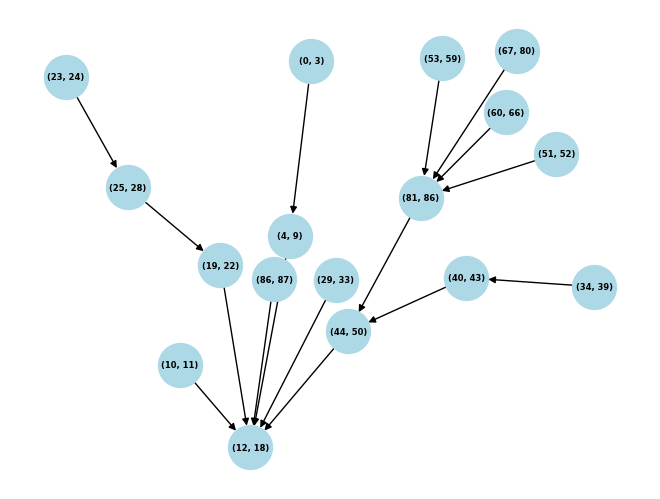

In [ ]:
G = Graphs_P1[0]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=6, font_weight="bold")

In [ ]:
Graphs_Q1 = []
for key, item in be_parser_res['stanza']['taiga'].items():
    Graphs_Q1.append(networkx_formatter(item, nx.DiGraph()))

In [ ]:
mmd = MMD(Graphs_P1, Graphs_Q1, kernel="wl", h=0)
print(f"MMD (WL): {mmd:.8f}")

MMD (WL): 0.00888795


In [ ]:
mmd = MMD(Graphs_P1, Graphs_Q1, kernel="wl", h=1)
print(f"MMD (WL): {mmd:.8f}")

MMD (WL): 0.00969175


In [ ]:
mmd = MMD(Graphs_P1, Graphs_Q1, kernel="wl", h=2)
print(f"MMD (WL): {mmd:.8f}")

MMD (WL): 0.00833935


In [ ]:
mmd = MMD(Graphs_P1, Graphs_Q1, kernel="wl", h=3)
print(f"MMD (WL): {mmd:.8f}")

MMD (WL): 0.00740819


In [ ]:
mmd = MMD(Graphs_P1, Graphs_Q1, kernel="wl", h=4)
print(f"MMD (WL): {mmd:.8f}")

MMD (WL): 0.00673062


In [ ]:
mmd = MMD(Graphs_P1, Graphs_Q1, kernel="wl", h=5)
print(f"MMD (WL): {mmd:.8f}")

MMD (WL): 0.00620483
